#Image classification + OOP

In [3]:
#Setup
!pip install -q torch torchvision scikit-learn

In [11]:
#Imports
import torch
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

from utils.data_loader import load_mnist, prepare_for_rf, prepare_for_torch
from models.classifier import MnistClassifier

In [5]:
#Load MNIST dataset
trainset, testset = load_mnist()

100%|██████████| 9.91M/9.91M [00:00<00:00, 18.5MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 502kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 4.70MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 9.64MB/s]


In [6]:
# For Random Forest (numpy arrays)
X_train_rf, y_train_rf, X_test_rf, y_test_rf = prepare_for_rf(trainset, testset)

# For Neural Networks (tensors)
X_train_torch, y_train_torch, X_test_torch, y_test_torch = prepare_for_torch(trainset, testset)

In [7]:
#Random Forest
rf_model = MnistClassifier(algorithm="rf", n_estimators=100)
rf_model.train(X_train_rf, y_train_rf)
rf_preds = rf_model.predict(X_test_rf)

rf_acc = accuracy_score(y_test_rf, rf_preds)
print(f"Random Forest Accuracy: {rf_acc:.4f}")

Random Forest Accuracy: 0.9705


In [8]:
#Feed-Forward Neural Network
nn_model = MnistClassifier(algorithm="nn", epochs=3, batch_size=128)
nn_model.train(X_train_torch, y_train_torch)
nn_preds = nn_model.predict(X_test_torch)

nn_acc = accuracy_score(y_test_torch, nn_preds)
print(f"Feed-Forward NN Accuracy: {nn_acc:.4f}")

Feed-Forward NN Accuracy: 0.9618


In [9]:
#Convolutional Neural Network
cnn_model = MnistClassifier(algorithm="cnn", epochs=3, batch_size=128)
cnn_model.train(X_train_torch, y_train_torch)
cnn_preds = cnn_model.predict(X_test_torch)

cnn_acc = accuracy_score(y_test_torch, cnn_preds)
print(f"CNN Accuracy: {cnn_acc:.4f}")

CNN Accuracy: 0.9879


In [10]:
# Compare results
print("\n Final Results:")
print(f"Random Forest   : {rf_acc:.4f}")
print(f"Feed-Forward NN : {nn_acc:.4f}")
print(f"CNN             : {cnn_acc:.4f}")


 Final Results:
Random Forest   : 0.9705
Feed-Forward NN : 0.9618
CNN             : 0.9879


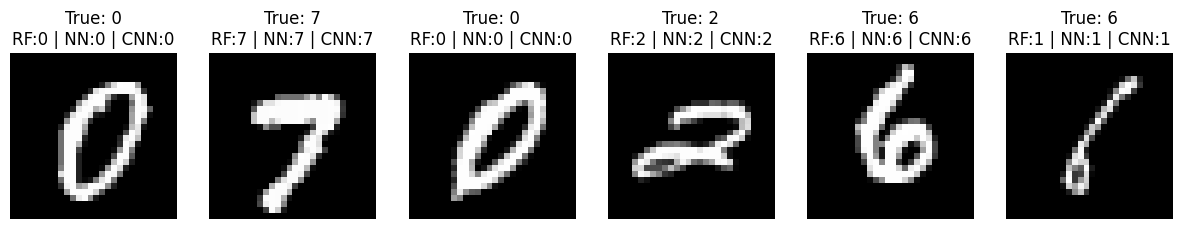

In [17]:
# Visualization of predictions
def show_predictions(images, true_labels, rf_preds, nn_preds, cnn_preds, n=6):
    """
    Display sample MNIST images with predictions from all three models.
    """
    plt.figure(figsize=(15, 3))
    for i in range(n):
        idx = np.random.randint(0, len(images))
        img = images[idx].squeeze()
        true = true_labels[idx].item()
        rf_p = rf_preds[idx]
        nn_p = nn_preds[idx].item()
        cnn_p = cnn_preds[idx].item()

        plt.subplot(1, n, i+1)
        plt.imshow(img, cmap="gray")
        plt.title(f"True: {true}\nRF:{rf_p} | NN:{nn_p} | CNN:{cnn_p}")
        plt.axis("off")
    plt.show()

show_predictions(X_test_torch, y_test_torch, rf_preds, nn_preds, cnn_preds, n=6)

**Sample Predictions Analysis**
- For most test digits, all three models predict correctly.
- Random Forest sometimes confuses digits with similar shapes (e.g., 6 - 1).
- Feed-Forward NN shows similar errors, likely due to limited feature extraction capability.
- CNN demonstrates superior robustness, correctly handling ambiguous digits such as 6.

### Conclusion
- Random Forest achieved ~97% accuracy, strong baseline for MNIST.
- Feed-Forward NN achieved ~96%, showing good learning ability but slightly lower due to limited architecture.
- CNN achieved ~99%, proving that convolutional models are the best choice for image classification tasks.